In [1]:
# stdlib imports
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 8")

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
from obspy import read
from obspy.signal.invsim import corn_freq_2_paz, simulate_seismometer

# local imports
from amptools.io.read import read_data

%matplotlib inline

sac_file = '../tests/data/process/UW.BRKS..ENE.SAC'
result_file = '../tests/data/process/UW.BRKS..ENE.psa'
stream = read(sac_file)
trace = stream[0]
periods, sas = np.genfromtxt(result_file, unpack=True, usecols=(0, 1))

1
1.1400354833471433 1.136752 0.2884312542263489
1
2.249812327713307 2.229939 0.8872513789041742
1
1.928161149018639 1.927996 0.008565471388062278
1
1.8174568845057828 1.805717 0.6480442220003556
1
1.3129304040169407 1.304918 0.6121365931385574
1
0.5698633573220991 0.565608 0.749531424929114
1
0.10118492514747582 0.1001898 0.9883317250931543
1
0.0508644119281434 0.04986167 1.9910273663950242
1
0.02078727510200115 0.01976554 5.039034155489396


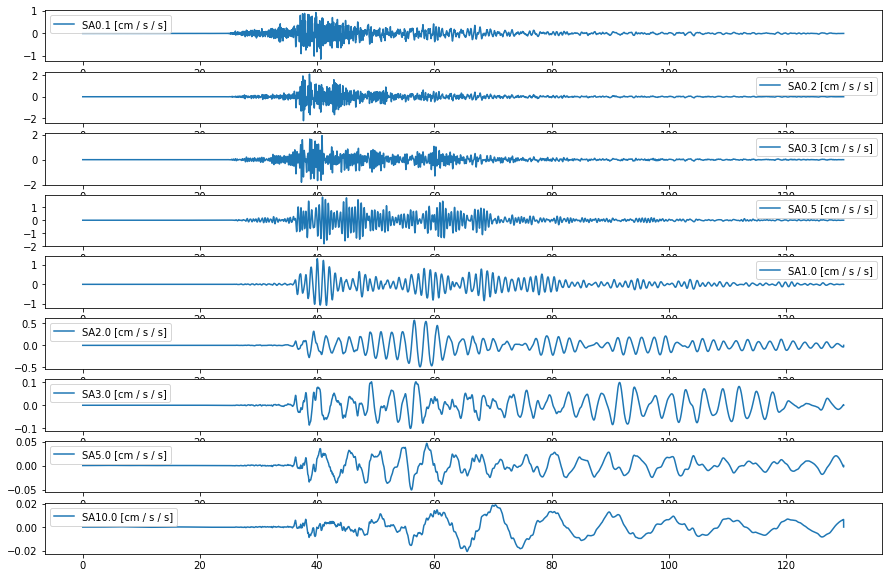

In [3]:
fig, axes = plt.subplots(len(periods), 1, figsize=(15, 10))
d = 0.05
dt = trace.stats.delta
ug = trace.data
kg = len(trace.data)
dt_in = trace.stats.delta
for period, sa, ax in zip(periods, sas, axes):
    w = 2 * np.pi / period
    pr = 2 * np.pi/w
    nn=1
    wd=np.sqrt(1.-d*d)*w
    w2=w*w
    w3=w2*w
    f2=1./w2
    f3=d*w
    f4=1./wd
    f5=f3*f4
    f6=2.*f3
    aa = np.zeros(kg)
    v = np.zeros(kg)
    dd = np.zeros(kg)

    ns= int(10.*dt_in/pr-0.01)+1
    dt=dt_in/float(ns)
    print(ns)
    for k in range(kg - 1):
        f1=2.*d/w3/dt
        e=np.exp(-f3*dt)
        g1=e*np.sin(wd*dt)
        g2=e*np.cos(wd*dt)
        h1=wd*g2-f3*g1
        h2=wd*g1+f3*g2
        dug=(ug[k+1]-ug[k])/float(ns)
        g=ug[k]
        z1=f2*dug
        z3=f1*dug
        z4=z1/dt
        z2=f2*g
        b=dd[k-1]+z2-z3
        a=f4*v[k-1]+f5*b+f4*z4
        dd[k]=a*g1+b*g2+z3-z2-z1
        v[k]=a*h1-b*h2-z4
        aa[k]=-f6*v[k]-w2*dd[k]
        nn = nn + 1
        g=g+dug
    #ax.plot(trace.times(), trace.data, label='Acceleration [cm / s / s]')
    ax.plot(trace.times(), aa, label='SA'  +  str(period)  +  ' [cm / s / s]')
    maxy = np.max(np.abs(aa))
    print(maxy, sa, np.abs(maxy  -  sa) /  ((maxy  +  sa)  *  0.5)  *  100)
    legend = ax.legend()
